In [1]:
import os
import keras

os.environ['CUDA_VISIBLE_DEVICES']=''

Using TensorFlow backend.


In [2]:
train,test=keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
x_train,y_train=train
x_test,y_test=test

x_train=x_train/255
x_test=x_test/255

x_train=x_train.reshape((len(x_train),-1))
x_test=x_test.reshape((len(x_test),-1))

y_train=keras.utils.to_categorical(y_train,num_classes=10)
y_test=keras.utils.to_categorical(y_test,num_classes=10)

In [0]:
def build_mlp():
  input_layer=keras.layers.Input([x_train.shape[-1]])
  x=keras.layers.Dense(units=512,activation='relu')(input_layer)
  x=keras.layers.Dense(units=256,activation='relu')(x)
  x=keras.layers.Dense(units=128,activation='relu')(x)
  out=keras.layers.Dense(units=10,activation='softmax')(x)

  model=keras.models.Model(inputs=[input_layer],outputs=[out])
  return model

In [7]:
model=build_mlp()
model.summary()

optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [8]:
model.fit(x_train,y_train,epochs=500,batch_size=256,validation_data=(x_test,y_test),shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 16s 329us/step - loss: 1.9199 - acc: 0.3050 - val_loss: 1.8339 - val_acc: 0.3442
Epoch 2/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.6985 - acc: 0.3953 - val_loss: 1.6856 - val_acc: 0.4042
Epoch 3/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.6122 - acc: 0.4257 - val_loss: 1.6090 - val_acc: 0.4170
Epoch 4/500
50000/50000 [==============================] - 15s 292us/step - loss: 1.5553 - acc: 0.4442 - val_loss: 1.5529 - val_acc: 0.4435
Epoch 5/500
50000/50000 [==============================] - 15s 299us/step - loss: 1.5032 - acc: 0.4643 - val_loss: 1.4868 - val_acc: 0.4725
Epoch 6/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.4656 - acc: 0.4778 - val_loss: 1.5118 - val_acc: 0.4634
Epoch 7/

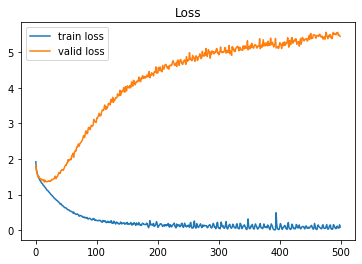

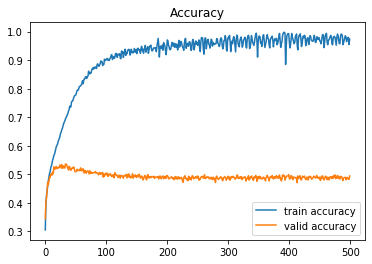

In [10]:
import matplotlib.pyplot as plt

train_loss=model.history.history['loss']
valid_loss=model.history.history['val_loss']

train_acc=model.history.history['acc']
valid_acc=model.history.history['val_acc']

plt.plot(range(len(train_loss)),train_loss,label='train loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train accuracy')
plt.plot(range(len(valid_acc)),valid_acc,label='valid accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()